In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

# IMPORTING DATA

In [3]:
path = './FuelConsumptionCo2.csv'

In [4]:
df = pd.read_csv(path)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Understanding Data

<ul>
    <li>MODEL YEAR - Eg. 2014</li>
    <li>MAKE - Eg. ACURA</li>
    <li>MODEL - Eg. ILX</li>
    <li>VEHICLE CLASS - Eg. SUV</li>
    <li>ENGINE SIZE - Eg. 1.5</li>
    <li>CYLINDERS - Eg. 5</li>
    <li>TRANSMISSION - Eg. A6</li>
    <li>FUEL CONSUMPTION in CITY(L/100 km) - Eg. 9.9</li>
    <li>FUEL CONSUMPTION in CITY(L/100 km) - Eg. 9.9</li>
    <li>FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2</li>
    <li>CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0</li>
</ul>

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [14]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(2)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221


Plotting the features

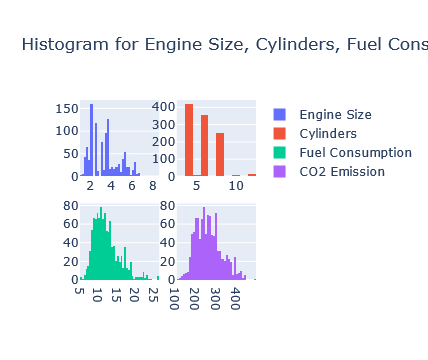

In [25]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

fig = make_subplots(rows=2, cols=2)
trace0 = go.Histogram(x = viz['ENGINESIZE'], name='Engine Size')
trace1 = go.Histogram(x=viz['CYLINDERS'], name='Cylinders')
trace2 = go.Histogram(x=viz['FUELCONSUMPTION_COMB'], name='Fuel Consumption')
trace3 = go.Histogram(x=viz['CO2EMISSIONS'], name='CO2 Emission')
fig.update_layout(title='Histogram for Engine Size, Cylinders, Fuel Consumption and Co2 Emission')
fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)
fig.append_trace(trace2,2,1)
fig.append_trace(trace3,2,2)
fig.show()


Now, let's plot each of these features against the Emission, to see how linear their relationship is:


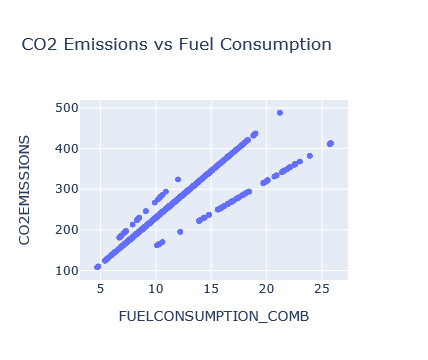

In [32]:
fig = px.scatter(cdf, x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS',
                title = 'CO2 Emissions vs Fuel Consumption')
fig.show()

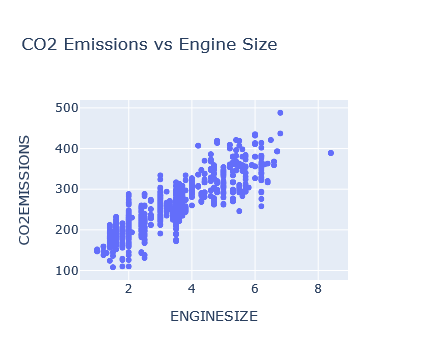

In [34]:
fig = px.scatter(cdf, x='ENGINESIZE', y='CO2EMISSIONS',
                title='CO2 Emissions vs Engine Size')

fig.show()

## Practice

Plot **CYLINDER** vs the Emission, to see how linear is their relationship is:


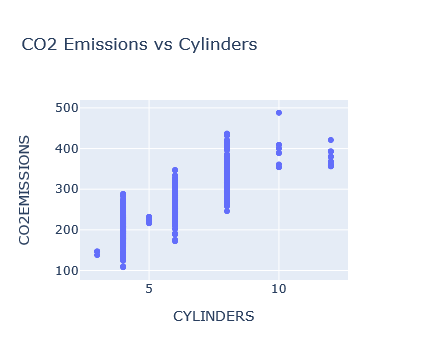

In [36]:
fig = px.scatter(cdf, x='CYLINDERS', y='CO2EMISSIONS',
                title='CO2 Emissions vs Cylinders')

fig.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:


In [43]:
from sklearn.model_selection import train_test_split


x_data = df.drop(['CO2EMISSIONS'], axis=1)
y_data = df[['CO2EMISSIONS']]
x_train, x_test, y_train, y_test = train_test_split(
                                    x_data, y_data,
                                    test_size=.2, 
                                    random_state=0)



,CO2EMISSIONS
270,290
1006,347
728,244
992,218
702,170
...,...
1033,186
763,256
835,269
559,306


### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.


In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train[['ENGINESIZE']], y_train)

print('Coefficient:',lr.coef_,'Intercept:',lr.intercept_)

Coefficient: [[39.24838431]] Intercept: [126.18920155]


As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.


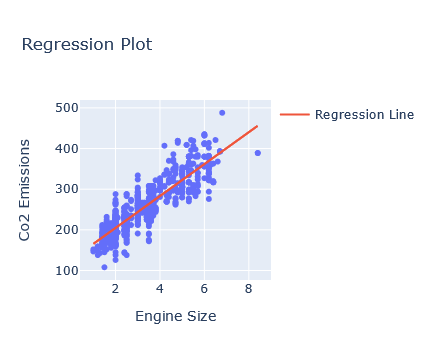

In [63]:
fig = px.scatter(x=x_train['ENGINESIZE'], y=y_train['CO2EMISSIONS'],
                labels={'x':'Engine Size', 'y':'Co2 Emissions'},
                title='Regression Plot')


fig.add_trace(go.Scatter(x=x_train['ENGINESIZE'],
                         y=126.189 + 39.248*x_train['ENGINESIZE'],
                         name='Regression Line'))
fig.show()

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [68]:
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse

yhat = lr.predict(x_test[['ENGINESIZE']])

print('Mean Absolute Error:', mae(y_test, yhat))
print('Mean Squared Error:', mse(y_test, yhat))
print('R2 Score:', r2_score(y_test, yhat))

Mean Absolute Error: 25.56889045602356
Mean Squared Error: 1181.528809303555
R2 Score: 0.7201153918073576


### *The model can predict the CO2 Emissions with an accuracy of 72%*